In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve

In [2]:
tc = pd.read_csv(r'https://drive.google.com/uc?export=download&id=1ItyV8VUN7N1V6UN1wM99DUjBRgaXR6Jn')

In [3]:
tc.head().T

,0,1,2,3,4
PassengerId,1,2,3,4,5
Survived,0,1,1,1,0
Pclass,3,1,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry"
Sex,male,female,female,female,male
Age,22.0,38.0,26.0,35.0,35.0
SibSp,1,1,0,1,0
Parch,0,0,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450
Fare,7.25,71.2833,7.925,53.1,8.05


**Исследовательский анализ данных**

Разведочный анализ. Анализ значимости переменных

<Axes: >

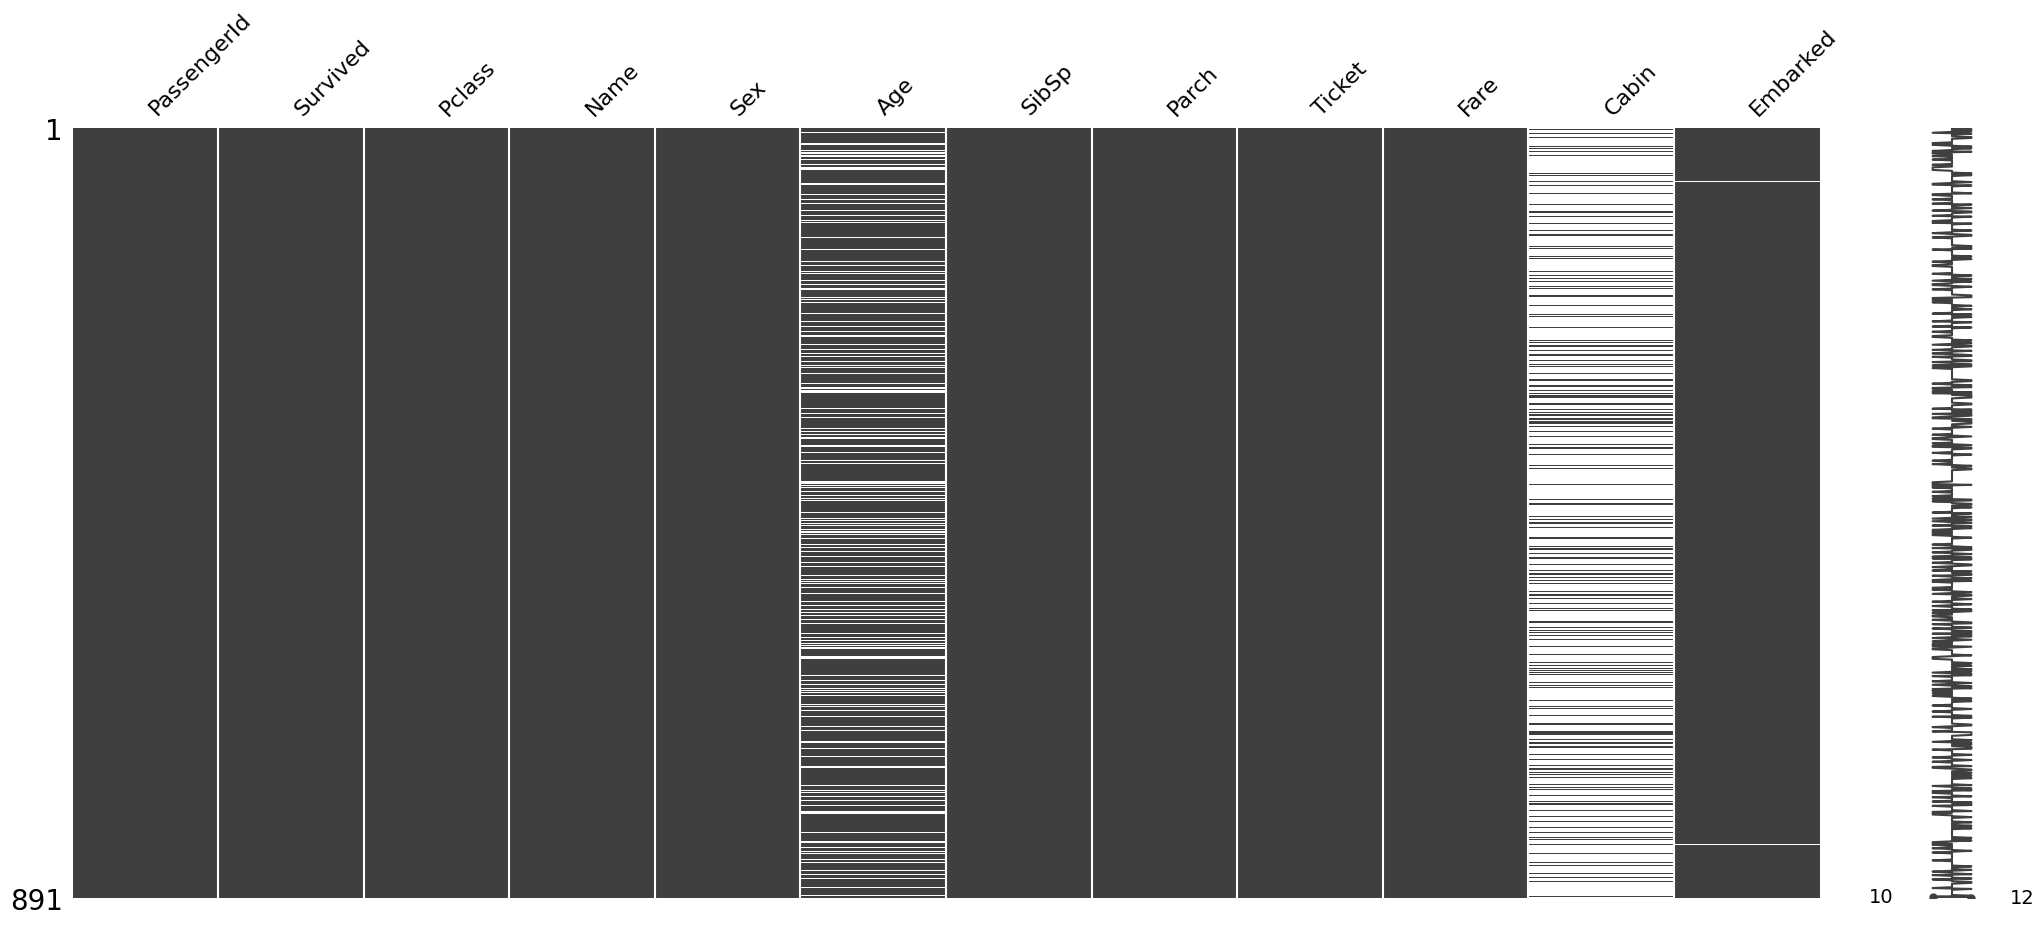

In [4]:
msno.matrix(tc)

Text(0.5, 1.0, 'Missing values heatmap')

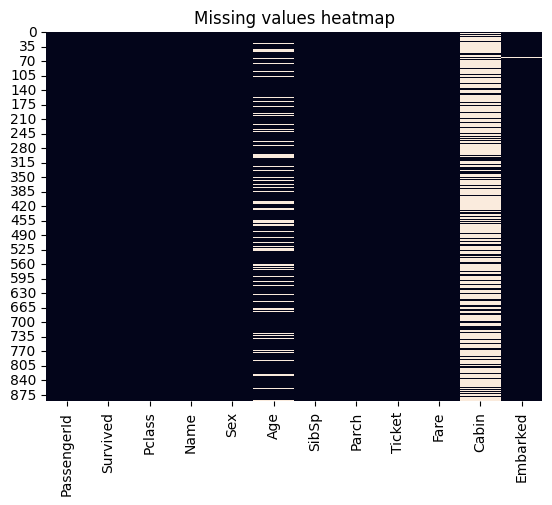

In [5]:
sns.heatmap(tc.isnull(), cbar=False).set_title("Missing values heatmap")

In [6]:
tc_description = pd.DataFrame({'null': tc.isnull().sum(),
                                'nunique': tc.nunique(),
                                'dtypes': tc.dtypes,
                                'example': tc.T[0]})

tc_description

,null,nunique,dtypes,example
PassengerId,0,891,int64,1
Survived,0,2,int64,0
Pclass,0,3,int64,3
Name,0,891,object,"Braund, Mr. Owen Harris"
Sex,0,2,object,male
Age,177,88,float64,22.0
SibSp,0,7,int64,1
Parch,0,7,int64,0
Ticket,0,681,object,A/5 21171
Fare,0,248,float64,7.25


In [7]:
tc.groupby('Survived')['PassengerId'].count()

Survived
0    549
1    342
Name: PassengerId, dtype: int64

In [8]:
tc_pclass = tc.groupby(['Pclass', 'Survived'])['PassengerId'].count().reset_index()
tc_pclass

,Pclass,Survived,PassengerId
0,1,0,80
1,1,1,136
2,2,0,97
3,2,1,87
4,3,0,372
5,3,1,119


<Axes: xlabel='Pclass', ylabel='PassengerId'>

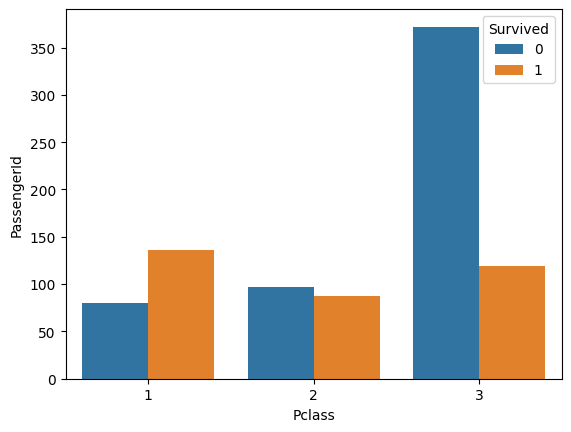

In [9]:
sns.barplot(data=tc_pclass, x='Pclass', y='PassengerId', hue='Survived')

In [10]:
tc.groupby('Sex')['PassengerId'].count()

Sex
female    314
male      577
Name: PassengerId, dtype: int64

In [11]:
tc['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

C:\Users\nadys\AppData\Local\Temp\ipykernel_14696\3988770432.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tc_age = tc.groupby(['Age_range', 'Survived'])['PassengerId'].count().reset_index()


<Axes: xlabel='Age_range', ylabel='PassengerId'>

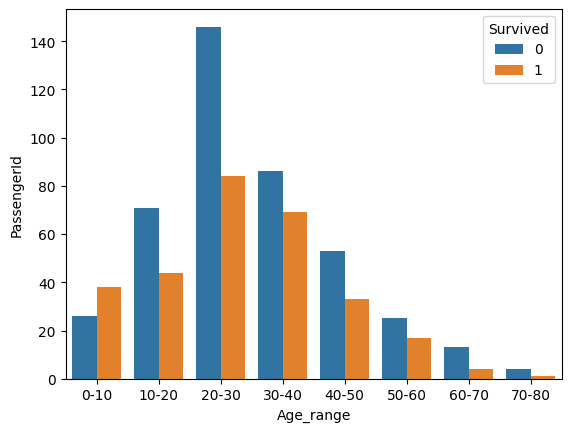

In [12]:
tc['Age_range'] = pd.cut(tc['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80], labels=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])

tc_age = tc.groupby(['Age_range', 'Survived'])['PassengerId'].count().reset_index()

sns.barplot(data=tc_age, x='Age_range', y='PassengerId', hue='Survived')

C:\Users\nadys\AppData\Local\Temp\ipykernel_14696\2608263607.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tc_sibsp = tc.groupby(['SibSp_range', 'Survived'])['PassengerId'].count().reset_index()


<Axes: xlabel='SibSp_range', ylabel='PassengerId'>

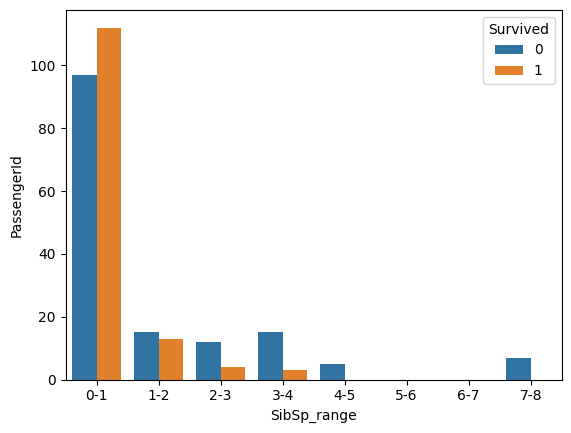

In [13]:
tc['SibSp_range'] = pd.cut(tc['SibSp'], bins=[0, 1, 2, 3, 4, 5, 6, 7, 8], labels=['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8'])

tc_sibsp = tc.groupby(['SibSp_range', 'Survived'])['PassengerId'].count().reset_index()

sns.barplot(data=tc_sibsp, x='SibSp_range', y='PassengerId', hue='Survived')

In [14]:
tc['Family'] = tc['Parch'] + tc['SibSp']

In [15]:
tc['Is_Alone'] = tc['Family'] == 0

C:\Users\nadys\AppData\Local\Temp\ipykernel_14696\309255500.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tc_fare = tc.groupby(['Fare_range', 'Survived'])['PassengerId'].count().reset_index()


<Axes: xlabel='Fare_range', ylabel='PassengerId'>

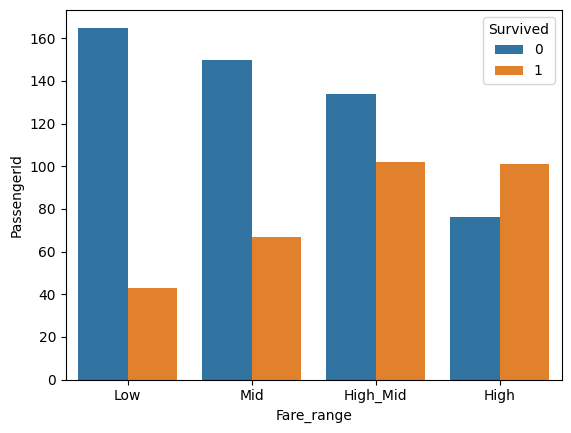

In [16]:
tc['Fare_range'] = pd.cut(tc['Fare'], bins=[0, 7.90, 14.45, 31.28, 120], labels=['Low', 'Mid', 'High_Mid', 'High'])

tc_fare = tc.groupby(['Fare_range', 'Survived'])['PassengerId'].count().reset_index()

sns.barplot(data=tc_fare, x='Fare_range', y='PassengerId', hue='Survived')

<Axes: xlabel='Embarked', ylabel='PassengerId'>

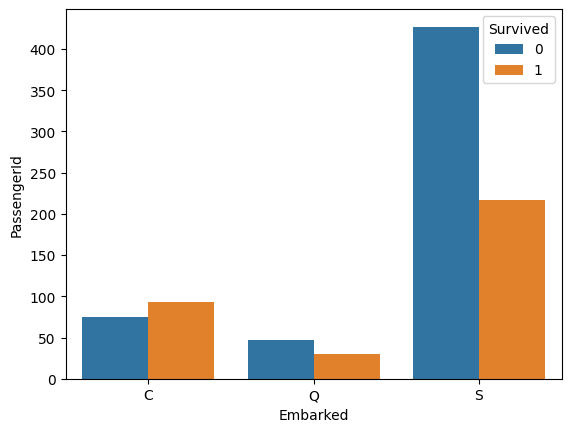

In [17]:
tc_embarked = tc.groupby(['Embarked', 'Survived'])['PassengerId'].count().reset_index()

sns.barplot(data=tc_embarked, x='Embarked', y='PassengerId', hue='Survived')

In [18]:
tc = tc.drop(columns=['Age_range', 'Fare_range', 'SibSp_range'])

Заполнение пропущенных данных

Text(0.5, 1.0, 'Missing values heatmap')

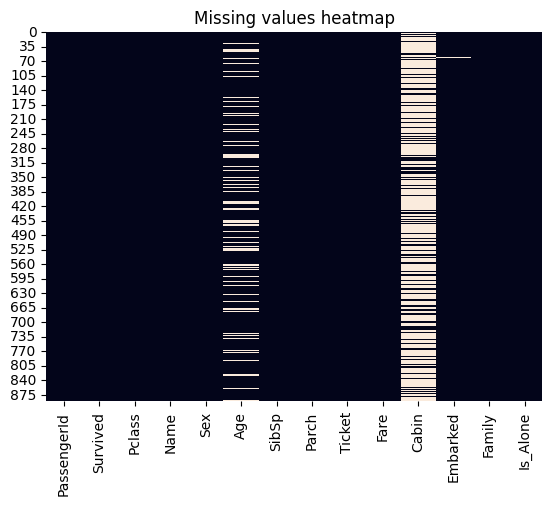

In [19]:
sns.heatmap(tc.isnull(), cbar=False).set_title("Missing values heatmap")

In [20]:
tc_description

,null,nunique,dtypes,example
PassengerId,0,891,int64,1
Survived,0,2,int64,0
Pclass,0,3,int64,3
Name,0,891,object,"Braund, Mr. Owen Harris"
Sex,0,2,object,male
Age,177,88,float64,22.0
SibSp,0,7,int64,1
Parch,0,7,int64,0
Ticket,0,681,object,A/5 21171
Fare,0,248,float64,7.25


In [21]:
tc['Embarked'].fillna(tc['Embarked'].mode()[0], inplace=True)

C:\Users\nadys\AppData\Local\Temp\ipykernel_14696\3506944515.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tc['Embarked'].fillna(tc['Embarked'].mode()[0], inplace=True)


In [22]:
tc['Cabin'] = tc['Cabin'].fillna('NA')

In [23]:
tc['Salutation'] = tc['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())

tc['Salutation'].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Salutation, dtype: object

In [24]:
grp = tc.groupby(['Sex', 'Pclass'])

In [25]:
grp['Age'].apply(lambda x: x.fillna(x.median()))
tc['Age'].fillna(tc['Age'].median(), inplace=True)

C:\Users\nadys\AppData\Local\Temp\ipykernel_14696\1293669160.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tc['Age'].fillna(tc['Age'].median(), inplace=True)


Удаление ненужных переменных

In [26]:
tc.head().T

,0,1,2,3,4
PassengerId,1,2,3,4,5
Survived,0,1,1,1,0
Pclass,3,1,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry"
Sex,male,female,female,female,male
Age,22.0,38.0,26.0,35.0,35.0
SibSp,1,1,0,1,0
Parch,0,0,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450
Fare,7.25,71.2833,7.925,53.1,8.05


In [27]:
tc = tc.drop(columns=['Name', 'Salutation', 'Ticket', 'SibSp', 'Parch', 'Is_Alone', 'PassengerId'])
tc.head().T

,0,1,2,3,4
Survived,0,1,1,1,0
Pclass,3,1,3,1,3
Sex,male,female,female,female,male
Age,22.0,38.0,26.0,35.0,35.0
Fare,7.25,71.2833,7.925,53.1,8.05
Cabin,NA,C85,NA,C123,NA
Embarked,S,C,S,S,S
Family,1,1,0,1,0


**Конструирование признаков**

In [28]:
tc_train_full, tc_test = train_test_split(tc, test_size=0.2, random_state=0)
tc_train, tc_val = train_test_split(tc_train_full, test_size=0.2, random_state=0)

y_train = tc_train['Survived'].values
y_test = tc_test['Survived'].values
y_val = tc_val['Survived'].values

del tc_train['Survived']
del tc_test['Survived']
del tc_val['Survived']

In [29]:
# пребразование датафрейма в список словарей

train_dict = tc_train.to_dict(orient='records')

train_dict

[{'Pclass': 1,
  'Sex': 'female',
  'Age': 35.0,
  'Fare': 90.0,
  'Cabin': 'C93',
  'Embarked': 'S',
  'Family': 1},
 {'Pclass': 3,
  'Sex': 'male',
  'Age': 38.0,
  'Fare': 7.8958,
  'Cabin': 'NA',
  'Embarked': 'S',
  'Family': 0},
 {'Pclass': 3,
  'Sex': 'male',
  'Age': 28.0,
  'Fare': 8.05,
  'Cabin': 'NA',
  'Embarked': 'S',
  'Family': 0},
 {'Pclass': 1,
  'Sex': 'female',
  'Age': 2.0,
  'Fare': 151.55,
  'Cabin': 'C22 C26',
  'Embarked': 'S',
  'Family': 3},
 {'Pclass': 2,
  'Sex': 'male',
  'Age': 18.0,
  'Fare': 73.5,
  'Cabin': 'NA',
  'Embarked': 'S',
  'Family': 0},
 {'Pclass': 3,
  'Sex': 'male',
  'Age': 28.0,
  'Fare': 15.5,
  'Cabin': 'NA',
  'Embarked': 'Q',
  'Family': 1},
 {'Pclass': 3,
  'Sex': 'male',
  'Age': 19.0,
  'Fare': 10.1708,
  'Cabin': 'NA',
  'Embarked': 'S',
  'Family': 0},
 {'Pclass': 1,
  'Sex': 'male',
  'Age': 48.0,
  'Fare': 76.7292,
  'Cabin': 'D33',
  'Embarked': 'C',
  'Family': 1},
 {'Pclass': 3,
  'Sex': 'male',
  'Age': 29.0,
  'Fare': 7.7

In [30]:
# преобразование списка словарей в матрицу для модели машинного обучения (прямое кодирование)

dv = DictVectorizer(sparse=False)
dv.fit(train_dict)
X_train = dv.transform(train_dict)

X_train[0]

array([35.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  1.,  1., 90.,  1.,  1.,  0.])

In [31]:
dv.get_feature_names_out()

array(['Age', 'Cabin=A10', 'Cabin=A14', 'Cabin=A16', 'Cabin=A19',
       'Cabin=A20', 'Cabin=A24', 'Cabin=A26', 'Cabin=A31', 'Cabin=A32',
       'Cabin=A34', 'Cabin=A36', 'Cabin=A5', 'Cabin=A6', 'Cabin=B101',
       'Cabin=B18', 'Cabin=B19', 'Cabin=B20', 'Cabin=B22', 'Cabin=B28',
       'Cabin=B3', 'Cabin=B30', 'Cabin=B35', 'Cabin=B38', 'Cabin=B39',
       'Cabin=B4', 'Cabin=B49', 'Cabin=B5', 'Cabin=B51 B53 B55',
       'Cabin=B57 B59 B63 B66', 'Cabin=B58 B60', 'Cabin=B69', 'Cabin=B71',
       'Cabin=B73', 'Cabin=B77', 'Cabin=B79', 'Cabin=B80',
       'Cabin=B82 B84', 'Cabin=B94', 'Cabin=B96 B98', 'Cabin=C101',
       'Cabin=C103', 'Cabin=C104', 'Cabin=C110', 'Cabin=C111',
       'Cabin=C118', 'Cabin=C123', 'Cabin=C124', 'Cabin=C125',
       'Cabin=C126', 'Cabin=C148', 'Cabin=C22 C26', 'Cabin=C23 C25 C27',
       'Cabin=C30', 'Cabin=C45', 'Cabin=C49', 'Cabin=C50', 'Cabin=C52',
       'Cabin=C65', 'Cabin=C68', 'Cabin=C70', 'Cabin=C78', 'Cabin=C82',
       'Cabin=C86', 'Cabin=C90', 'Cabi

**Создание модели машинного обучения**

In [32]:
# преобразование валидационной и тестовой выборок в матрицу

val_dict = tc_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

test_dict = tc_test.to_dict(orient='records')
X_test = dv.transform(test_dict)

In [33]:
log_regression = LogisticRegression(solver='liblinear', random_state=0)
log_regression.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [34]:
y_pred_val = log_regression.predict_proba(X_val)[:, 1]

survived_val = y_pred_val>=0.5

print(f'accuracy_val = {accuracy_score(y_val, survived_val.astype(int)):.3f}')
print(f'f1_val = {f1_score(y_val, survived_val):.3f}')

accuracy_val = 0.769
f1_val = 0.708


In [35]:
y_pred_test = log_regression.predict_proba(X_test)[:, 1]

survived_test = y_pred_test>=0.5

print(f'accuracy_test = {accuracy_score(y_test, survived_test.astype(int)):.3f}')
print(f'f1_test = {f1_score(y_test, survived_test):.3f}')

accuracy_test = 0.838
f1_test = 0.788


Площадь под кривой ROC = 0.872


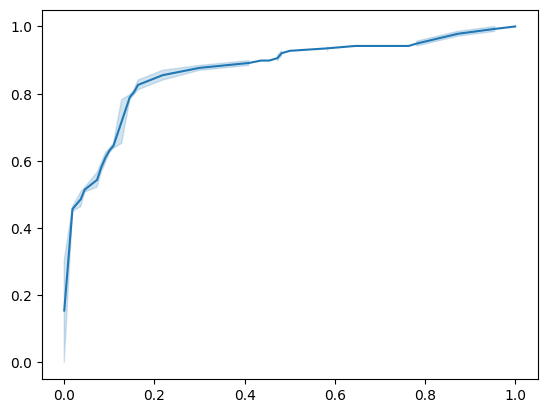

In [36]:
# график кривой ROC

from sklearn.metrics import roc_curve, roc_auc_score

false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred_test)

sns.lineplot(x=false_positive_rate, y=true_positive_rate)

print(f'Площадь под кривой ROC = {roc_auc_score(y_test, y_pred_test):.3f}')

In [37]:
from sklearn.naive_bayes import GaussianNB

gaussianNB = GaussianNB()
gaussianNB.fit(X_train, y_train)

y_pred_val = gaussianNB.predict_proba(X_val)[:, 1]
survived_val = y_pred_val>=0.5

print(f'accuracy_val = {accuracy_score(y_val, survived_val.astype(int)):.3f}')

accuracy_val = 0.615


In [38]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_score

bernoulliNB = BernoulliNB()
bernoulliNB.fit(X_train, y_train)

y_pred_val = bernoulliNB.predict_proba(X_val)[:, 1]

survived_val = y_pred_val>=0.5

print(f'accuracy_val = {accuracy_score(y_val, survived_val.astype(int)):.3f}')
cross_val_score(bernoulliNB, X_val, y_val, cv=5, scoring='accuracy')

accuracy_val = 0.734


array([0.82758621, 0.62068966, 0.68965517, 0.78571429, 0.71428571])

Площадь под кривой ROC = 0.790


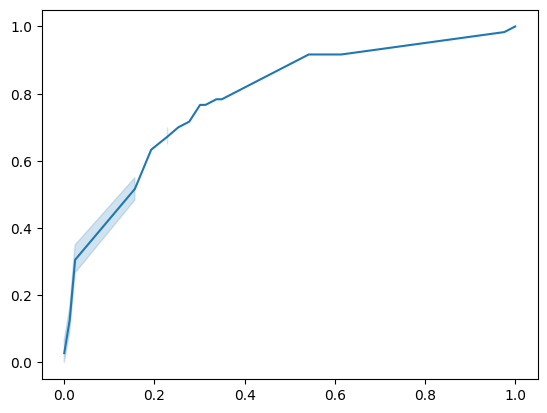

In [39]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_val, y_pred_val)

sns.lineplot(x=false_positive_rate, y=true_positive_rate)

print(f'Площадь под кривой ROC = {roc_auc_score(y_val, y_pred_val):.3f}')

In [40]:
tc.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Cabin', 'Embarked',
       'Family'],
      dtype='object')

In [41]:
tc_cat = tc[['Pclass', 'Sex', 'Cabin', 'Embarked', 'Family']]

In [42]:
tc_num = tc[['Age', 'Fare']]

In [43]:
y = tc['Survived'].values

tc_cat_train, tc_cat_test, y_train, y_test = train_test_split(tc_cat, y, test_size=0.2, random_state=0)
tc_num_train, tc_num_test = train_test_split(tc_num, test_size=0.2, random_state=0)

cat_train_dict = tc_cat_train.to_dict(orient='records')
cat_test_dict = tc_cat_test.to_dict(orient='records')

num_train_dict = tc_num_train.to_dict(orient='records')
num_test_dict = tc_num_test.to_dict(orient='records')

dv_cat = DictVectorizer(sparse=False)
dv_cat.fit(cat_train_dict)
X_cat_train = dv_cat.transform(cat_train_dict)
X_cat_test = dv_cat.transform(cat_test_dict)

dv_num = DictVectorizer(sparse=False)
dv_num.fit(num_train_dict)
X_num_train = dv_num.transform(num_train_dict)
X_num_test = dv_num.transform(num_test_dict)

In [46]:
from sklearn.naive_bayes import CategoricalNB, GaussianNB
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np

class MixedNB(BaseEstimator, ClassifierMixin):
    def __init__(self):
        self.cat_nb = CategoricalNB()
        self.gauss_nb = GaussianNB()

    def fit(self, X, y):
        self.cat_nb.fit(X_cat_train, y)
        self.gauss_nb.fit(X_num_train, y)
        return self

    def predict(self, X):
        proba_cat = self.cat_nb.predict_proba(X_cat_test)
        proba_num = self.gauss_nb.predict_proba(X_num_test)

        # Усредняем вероятности
        final_proba = (proba_cat + proba_num) / 2
        return np.argmax(final_proba, axis=1)

# Использование
model = MixedNB()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
survived = predictions>=0.5
accuracy_score(y_test, predictions)
# f1_score(y_test, predictions)

0.8324022346368715

In [49]:
tc.to_csv('tc.csv', index=False, encoding='utf-8')